# Homework #3
- submit your code here for problems 2 and 3

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function (of the homeworkx_x cells). Otherwise, you will get 0.
* Make sure homework2_1-2_3 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.


In [ ]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=11wi3AkNNpyvbOuJlGAHHrpyCesO6_d2I  -O coins.zip
!wget https://drive.google.com/uc?id=1B2DdZ4MPuCcEr9sXSy9g5bR9nD7veBOR  -O pyri.zip
!wget https://drive.google.com/uc?id=15Qs_2kJ7scBEDLc8YQ2bi0U6PKiLpnmn -O gemini.jpg
!unzip coins.zip
!unzip pyri.zip

--2025-11-13 17:35:36--  https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.google.com (drive.google.com)... 108.177.121.113, 108.177.121.102, 108.177.121.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL [following]
--2025-11-13 17:35:36--  https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.181.132, 2607:f8b0:4001:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.181.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112875 (110K) [image/png]
Saving to: ‘kitty55.png’

kitty55.png         100%[===================>] 110.23K  --.-KB/s    in 0.001s  

2025-11-13 17:35:38 (86.6 MB/s) - ‘kitty55.png

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_img(img, gray=False):
  if gray :
    plt.imshow(img, cmap='gray')
  else:
    plt.imshow(img)

In [ ]:
# homework3
import cv2
import numpy as np
from collections import defaultdict
# import your library here ... try not to display anything in the function

def homework3_2_count_coins(image_bgr):
  # input: image_bgr - is a bgr image read by opencv lib
  # output: (1) resulted_image is a bgr image with counted coins labelled
  #         (2) num_coins is dict containing the number of 1,2,5 and 10 Baht coins counted by your code (integer)

  return resulted_image, num_count



def homework3_4_count_spores(image_bgr):
  # input: image_bgr - is a bgr image read by opencv lib
  # output: (1) resulted_image is a bgr image with counted spores labelled
  #         (2) num_count is number of spore counted by your code (integer)


  return resulted_image, num_count


def homework3_5_gemini_stars(image_bgr):
  # input: image_bgr - is a bgr image read by opencv lib
  # output: return an image of only the brightened stars of Gemini.


  return stars_of_gemini



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def remove_background_withts(img, threshold = 120):
  #input = bgr cv2.imread('path')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray[gray > 120] = 255
  return gray

In [ ]:
def map_gray_to_color(img_bgr, gray_mask):
  # img_bgr: original BGR uint8 image (H,W,3)
  # gray_mask: single-channel uint8 image (H,W). pixels equal to 255 are background.
  mask = (gray_mask == 255)
  out = img_bgr.copy()
  out[mask] = 255
  return out

In [ ]:
coin1 = cv2.imread('Coin_1.png')
coin2 = cv2.imread('Coin_2.png')
coin3 = cv2.imread('Coin_3.png')
coin4 = cv2.imread('Coin_4.png')

In [ ]:
coin1_img = map_gray_to_color(coin1,remove_background_withts(coin1))
coin2_img = map_gray_to_color(coin2,remove_background_withts(coin2))
coin3_img = map_gray_to_color(coin3,remove_background_withts(coin3))
coin4_img = map_gray_to_color(coin4,remove_background_withts(coin4))

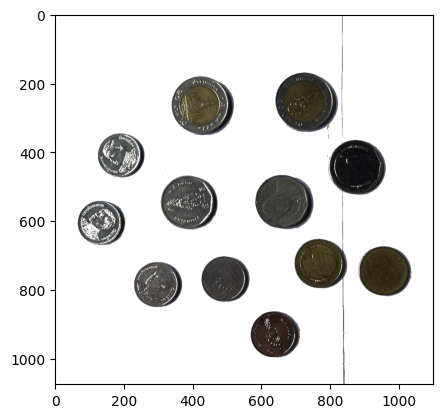

In [ ]:
show_img(cv2.cvtColor(coin1_img, cv2.COLOR_BGR2RGB))

In [ ]:
def classify_coin_by_color(mean_bgr, blue_thresh=1):
    b, g, r = mean_bgr
    # blue if B is noticeably larger than both R and G
    if (b - max(r, g)) > blue_thresh:
        return "blue"
    # gray / silver if channels are close
    if max(abs(b - g), abs(b - r), abs(g - r)) < 12:
        return "gray"
    # fallback: choose whichever channel is largest
    return "blue" if b >= max(r, g) else "gray"

In [ ]:
def identify_coins(image,original_image, radius=(60,100), hough_params=(100, 40),
                   size_split=None, draw=True):

    img = image.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(
        blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
        param1=hough_params[0], param2=hough_params[1],
        minRadius=radius[0], maxRadius=radius[1]
    )
    if circles is None:
        out_img = image.copy() if draw else image
        report = {"counts": {"1":0,"2":0,"5":0,"10":0},
                  "total_coins": 0, "total_baht": 0, "labels": []}
        return out_img, report

    # handle Hough's nested array format
    if isinstance(circles, np.ndarray) and circles.ndim == 3:
        cirs = circles[0]
    else:
        cirs = np.asarray(circles)

    counts = defaultdict(int)
    labels = []
    out_img = original_image.copy()
    radii = [r for (_x, _y, r) in cirs]
    radii_sorted = sorted(radii, reverse=True)
    biggest_radius = radii_sorted[1]
    big = biggest_radius - (0.08 * biggest_radius)
    medium = biggest_radius - (0.17 * biggest_radius)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    for (x_f, y_f, r_f) in cirs:
        x, y, r = int(round(x_f)), int(round(y_f)), int(round(r_f))

        # sample small patch around center (clamp to image bounds)
        patch_r = max(2, min(8, r // 4))   # tuneable
        x0 = max(0, x - patch_r)
        x1 = min(image.shape[1], x + patch_r + 1)
        y0 = max(0, y - patch_r)
        y1 = min(image.shape[0], y + patch_r + 1)
        patch = hsv_img[y0:y1, x0:x1]

        if patch.size == 0:
            mean_h, mean_s, mean_v = 0.0, 0.0, 0.0
        else:
            mean_h = float(np.mean(patch[:, :, 0]))
            mean_s = float(np.mean(patch[:, :, 1]))
            mean_v = float(np.mean(patch[:, :, 2]))

        # classify color by saturation threshold
        if mean_s >= 80:
            color_name = "gold"   # saturated -> gold (ทอง/ทองแดง)
        else:
            color_name = "gray"   # desaturated -> silver/gray

        # size by previously computed split (e.g., median of detected radii)
        if r >= big:
            size_name = "big"
        elif r >= medium:
            size_name = "medium"
        else:
            size_name = "small"


        if size_name == "big" and color_name == "gold":
            denom = 10
        elif (size_name == "big" or size_name == "medium") and color_name == "gray":
            denom = 5
        elif (size_name == "small" or size_name == "medium") and color_name == "gold":
            denom = 2
        else:
            denom = 1

        counts[str(denom)] += 1
        labels.append({"x": x, "y": y, "r": r, "color": color_name, "size": size_name, "denom": denom})

        if draw:
            # draw circle and label
            cv2.circle(out_img, (x, y), r, (0, 255, 0), 2)
            txt = f"{denom}B"
            cv2.putText(out_img, txt, (x - r//2, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2, cv2.LINE_AA)

    total_coins = sum(counts.values())
    total_baht = sum(int(k) * v for k, v in counts.items())

    report = {
        "counts": {"1": counts.get("1", 0), "2": counts.get("2", 0),
                   "5": counts.get("5", 0), "10": counts.get("10", 0)},
        "total_coins": int(total_coins),
    }

    return out_img, report

In [ ]:
out1,report1 = identify_coins(coin1_img,coin1, hough_params=(100, 40))

In [ ]:
print(report1)

{'counts': {'1': 5, '2': 3, '5': 3, '10': 2}, 'total_coins': 13}


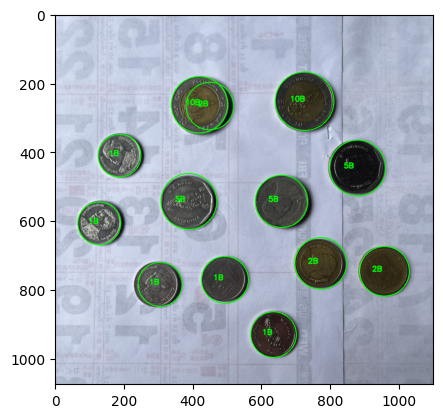

In [ ]:
show_img(cv2.cvtColor(out1, cv2.COLOR_BGR2RGB))

{'counts': {'1': 14, '2': 8, '5': 7, '10': 3}, 'total_coins': 32}


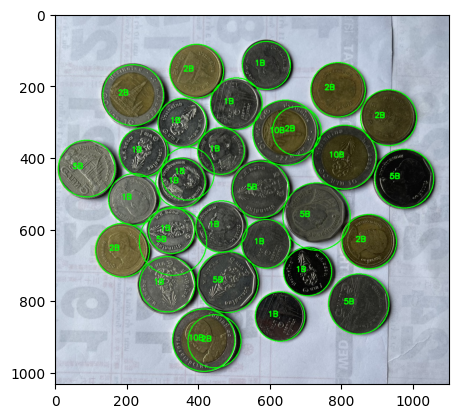

In [ ]:
out2 ,report2 = identify_coins(coin2_img,coin2, hough_params=(100, 40))
print(report2)
show_img(cv2.cvtColor(out2, cv2.COLOR_BGR2RGB))

{'counts': {'1': 23, '2': 14, '5': 13, '10': 8}, 'total_coins': 58}


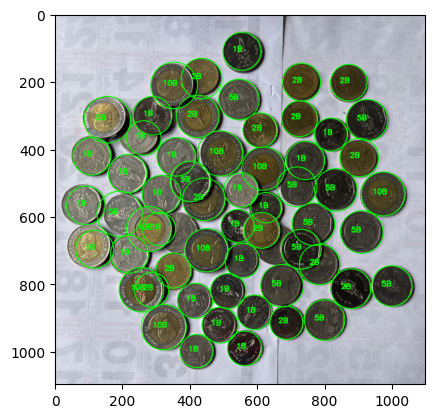

In [ ]:
out3, report3 = identify_coins(coin3_img,coin3, hough_params=(100, 40), radius=(30,70))
print(report3)
show_img(cv2.cvtColor(out3, cv2.COLOR_BGR2RGB))

{'counts': {'1': 35, '2': 3, '5': 17, '10': 3}, 'total_coins': 58}


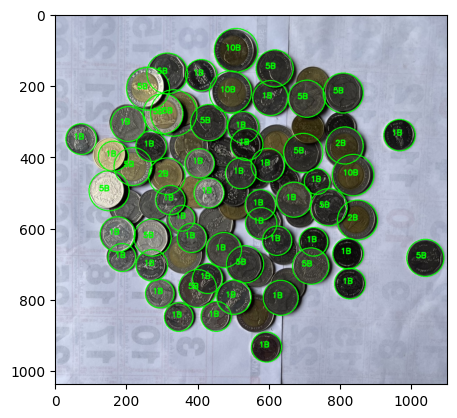

In [ ]:
out4,report4 = identify_coins(coin4_img,coin4, hough_params=(100, 40), radius=(30,70))
print(report4)
show_img(cv2.cvtColor(out4, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
import numpy as np

def visualize_two_saturation_cc(img_bgr,
                                sat_th=60,
                                white_th=250,
                                min_area=50,
                                alpha=0.6,
                                seed=50):
    h,w = img_bgr.shape[:2]
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    sat = hsv[:,:,1].astype(np.uint8)

    # white mask
    is_white = (img_bgr[:,:,0] > white_th) & (img_bgr[:,:,1] > white_th) & (img_bgr[:,:,2] > white_th)
    nonwhite = (~is_white).astype(np.uint8)

    # two masks by saturation (only non-white)
    mask_high = ((sat > sat_th) & (nonwhite==1)).astype(np.uint8)
    mask_low  = ((sat <= sat_th) & (nonwhite==1)).astype(np.uint8)

    # morphological clean
    k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    mask_high = cv2.morphologyEx(mask_high, cv2.MORPH_OPEN, k)
    mask_low  = cv2.morphologyEx(mask_low,  cv2.MORPH_OPEN, k)

    # CC for each
    n_h, labels_h, stats_h, cents_h = cv2.connectedComponentsWithStats(mask_high, connectivity=8)
    n_l, labels_l, stats_l, cents_l = cv2.connectedComponentsWithStats(mask_low,  connectivity=8)

    # palette reproducible
    rng = np.random.RandomState(seed)
    # generate color for each label (index 0 background)
    pal_h = np.vstack(([0,0,0], rng.randint(0,256,(max(1,n_h-1),3),dtype=np.uint8)))
    pal_l = np.vstack(([0,0,0], rng.randint(0,256,(max(1,n_l-1),3),dtype=np.uint8)))

    # build color images (only keep components >= min_area)
    col_h = np.zeros((h,w,3), dtype=np.uint8)
    col_l = np.zeros((h,w,3), dtype=np.uint8)

    for lab in range(1, n_h):
        area = int(stats_h[lab, cv2.CC_STAT_AREA])
        if area < min_area:
            labels_h[labels_h==lab] = 0
            continue
        col_h[labels_h==lab] = pal_h[lab]

    for lab in range(1, n_l):
        area = int(stats_l[lab, cv2.CC_STAT_AREA])
        if area < min_area:
            labels_l[labels_l==lab] = 0
            continue
        col_l[labels_l==lab] = pal_l[lab]

    # overlays
    out_high = img_bgr.copy()
    out_low  = img_bgr.copy()
    mask_h_overlay = (labels_h > 0)
    mask_l_overlay = (labels_l > 0)

    out_high[mask_h_overlay] = cv2.addWeighted(col_h[mask_h_overlay], alpha, out_high[mask_h_overlay], 1-alpha, 0)
    out_low[mask_l_overlay]  = cv2.addWeighted(col_l[mask_l_overlay],  alpha, out_low[mask_l_overlay],  1-alpha, 0)

    # combined (low overlay first, then high so high appears on top)
    combined = img_bgr.copy()
    combined[mask_l_overlay] = cv2.addWeighted(col_l[mask_l_overlay], alpha, combined[mask_l_overlay], 1-alpha, 0)
    combined[mask_h_overlay] = cv2.addWeighted(col_h[mask_h_overlay], alpha, combined[mask_h_overlay], 1-alpha, 0)

    return combined, out_high, out_low, labels_h, labels_l, stats_h, stats_l


(np.float64(-0.5), np.float64(1099.5), np.float64(1074.5), np.float64(-0.5))

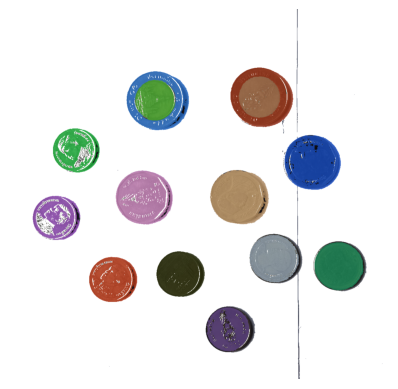

In [ ]:
combined1, high_vis1, low_vis1, labels_h1, labels_l1, stats_h1, stats_l1 = visualize_two_saturation_cc(coin1_img, sat_th=60, white_th=250, min_area=4000, seed = 5)
plt.imshow(cv2.cvtColor(combined1, cv2.COLOR_BGR2RGB)); plt.axis('off')

(np.float64(-0.5), np.float64(1102.5), np.float64(1032.5), np.float64(-0.5))

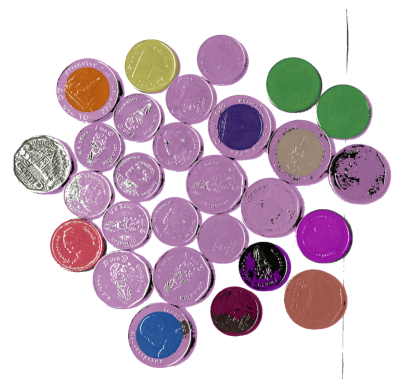

In [ ]:
combined2, high_vis2, low_vis2, labels_h2, labels_l2, stats_h2, stats_l2 = visualize_two_saturation_cc(coin2_img, sat_th=60, white_th=250, min_area=4000, seed = 42)
plt.imshow(cv2.cvtColor(combined2, cv2.COLOR_BGR2RGB)); plt.axis('off')

(np.float64(-0.5), np.float64(1099.5), np.float64(1096.5), np.float64(-0.5))

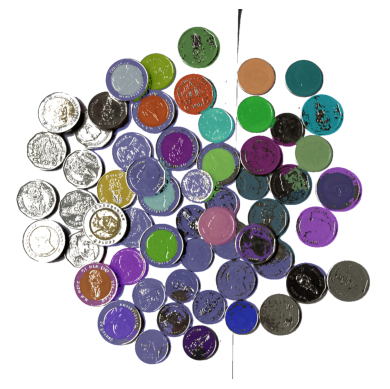

In [ ]:
combined3, high_vis3, low_vis3, labels_h3, labels_l3, stats_h3, stats_l3 = visualize_two_saturation_cc(coin3_img, sat_th=60, white_th=250, min_area=4000, seed = 5)
plt.imshow(cv2.cvtColor(combined3, cv2.COLOR_BGR2RGB)); plt.axis('off')

(np.float64(-0.5), np.float64(1100.5), np.float64(1036.5), np.float64(-0.5))

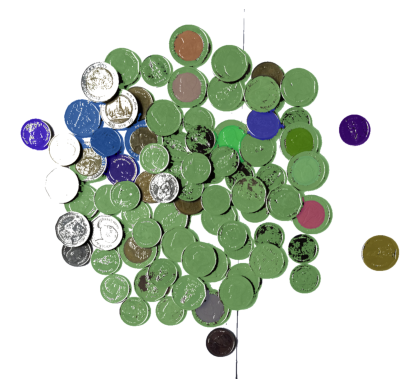

In [ ]:
combined4, high_vis4, low_vis4, labels_h4, labels_l4, stats_h4, stats_l4 = visualize_two_saturation_cc(coin4_img, sat_th=60, white_th=250, min_area=4000, seed = 5)
plt.imshow(cv2.cvtColor(combined4, cv2.COLOR_BGR2RGB)); plt.axis('off')

In [ ]:
!wget https://drive.google.com/uc?id=1dRD0bZ9i4slaS-HmVSIX4m5Is1wsQ8eW -O speed.jpg

In [ ]:
# write your own functions here (if needed)
# Image Augmentation
import cv2
import imutils
import matplotlib.pyplot as plt
import random
import numpy as np

def rotate_image(image, angle):
  rotated_image = imutils.rotate(image, angle)
  return rotated_image

def translate_image(image, x, y):
  translated_image = imutils.translate(image, x, y)
  return translated_image

def random_crop_and_resize(image, crop_frac = 0.8):
    h, w = image.shape[:2]
    new_h = int(h * crop_frac)
    new_w = int(w * crop_frac)
    top = random.randint(0, h - new_h)
    left = random.randint(0, w - new_w)
    crop = image[top:top + new_h, left:left + new_w]
    resized = cv2.resize(crop, (w, h), interpolation=cv2.INTER_LINEAR)
    return resized

def add_gaussian_noise(image, mean = 0.0, sigma= 10.0):
    if image.dtype != np.float32 and image.dtype != np.float64:
        img = image.astype(np.float32)
    else:
        img = image.copy()
    noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy = img + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def increase_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    brighthen_img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return brighthen_img




In [ ]:
speed_img = cv2.imread("speed.jpg")
speed_rgb = cv2.cvtColor(speed_img, cv2.COLOR_BGR2RGB)
kitty_img = cv2.imread("kitty55.png")
kitty_rgb = cv2.cvtColor(kitty_img, cv2.COLOR_BGR2RGB)

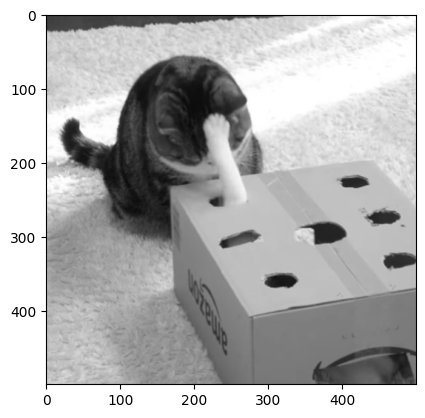

In [ ]:
plt.imshow(kitty_rgb)

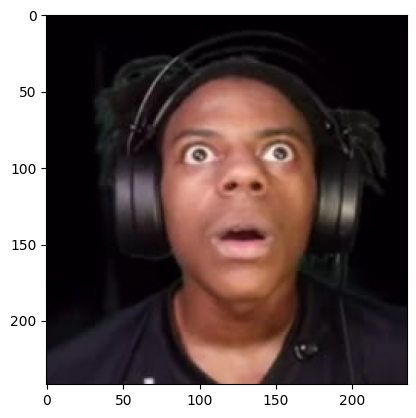

In [ ]:
plt.imshow(speed_rgb)

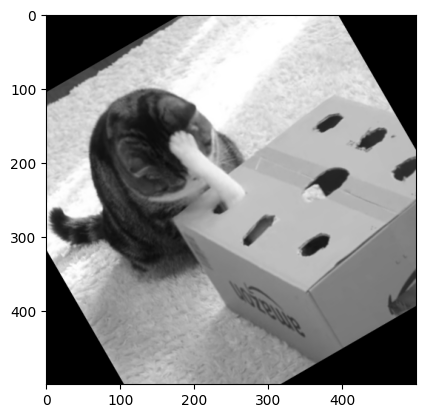

In [ ]:
plt.imshow(rotate_image(kitty_rgb,30))

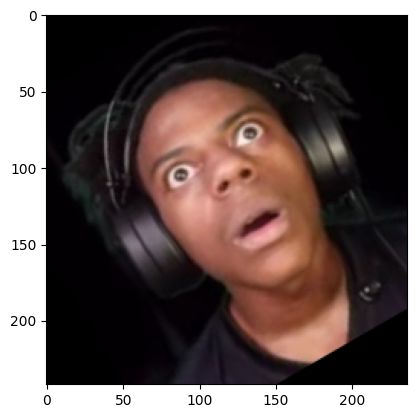

In [ ]:
plt.imshow(rotate_image(speed_rgb,30))

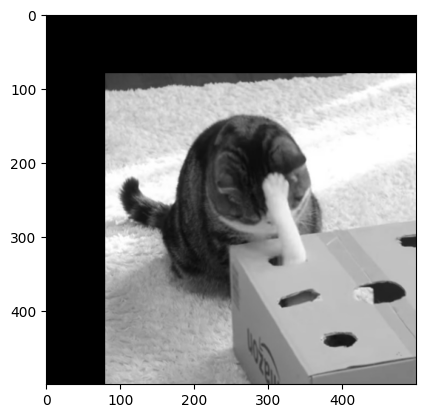

In [ ]:
plt.imshow(translate_image(kitty_rgb,80,80))

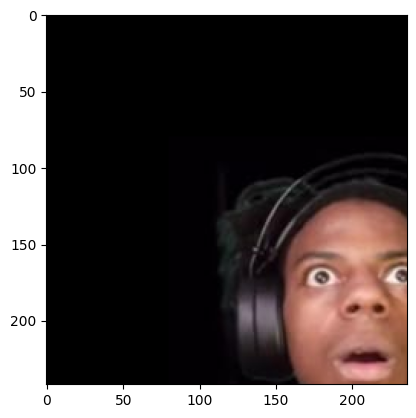

In [ ]:
plt.imshow(translate_image(speed_rgb,80,80))

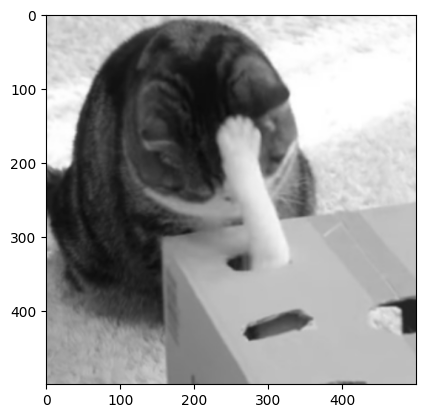

In [ ]:
plt.imshow(random_crop_and_resize(kitty_rgb, 0.6))

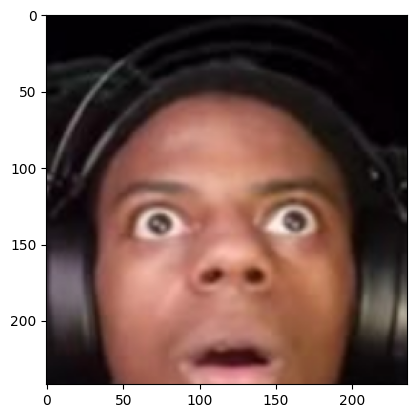

In [ ]:
plt.imshow(random_crop_and_resize(speed_rgb, 0.6))

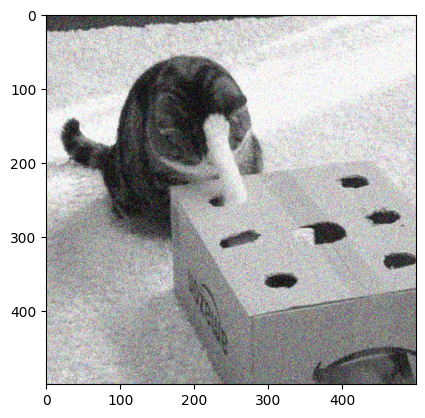

In [ ]:
plt.imshow(add_gaussian_noise(kitty_rgb,5.0,30.0))

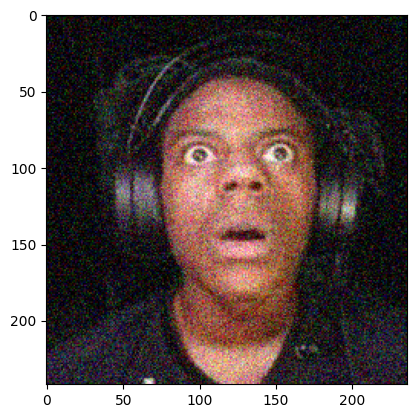

In [ ]:
plt.imshow(add_gaussian_noise(speed_rgb,5.0,30.0))

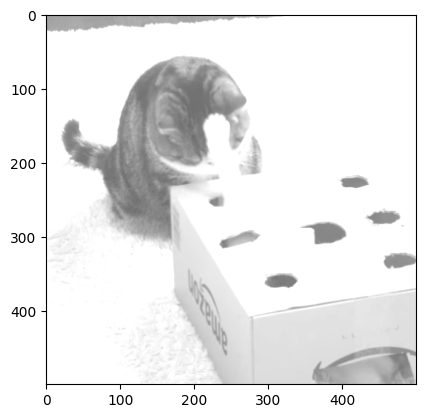

In [ ]:
plt.imshow(increase_brightness(kitty_rgb, 100))

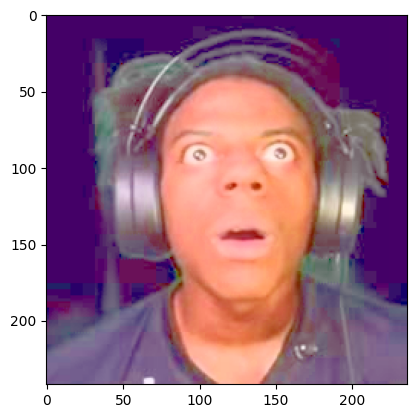

In [ ]:
plt.imshow(increase_brightness(speed_rgb, 100))

## No. 3. Vision Transformer with MNIST
(Use GPU in Runtime -> Change runtime type -> use GPU)

In [1]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [2]:
# 1. Multi-Head Self-Attention
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        self.scale = self.head_dim ** -0.5
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.last_attn = None # store attn

    def forward(self, x):
        B, N, D = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim)
        q, k, v = qkv[:, :, 0], qkv[:, :, 1], qkv[:, :, 2]
        q, k, v = q.transpose(1, 2), k.transpose(1, 2), v.transpose(1, 2)
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = F.softmax(attn, dim=-1)
        self.last_attn = attn # save attn
        out = (attn @ v).transpose(1, 2).reshape(B, N, D)
        return self.proj(out)

# 2. Transformer Encoder Block
class TransformerEncoder(nn.Module):
    def __init__(self, dim, num_heads=4, mlp_ratio=4):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn = MultiHeadSelfAttention(dim, num_heads)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(
            nn.Linear(dim, dim * mlp_ratio),
            nn.GELU(),
            nn.Linear(dim * mlp_ratio, dim)
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

# 3. Sin–Cos 2D Positional Encoding
class PositionalEncoding2D(nn.Module):
    def __init__(self, num_patches, dim):
        super().__init__()
        grid_size = int(math.sqrt(num_patches))
        assert grid_size ** 2 == num_patches, "num_patches must form a square grid"
        self.register_buffer("pos_embed", self.build_2d_sincos(dim, grid_size))

    def build_2d_sincos(self, dim, grid):
        assert dim % 2 == 0, "embedding dim must be divisible by 2"
        dim_half = dim // 2
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid, dtype=torch.float32),
            torch.arange(grid, dtype=torch.float32),
            indexing="ij"
        )
        pos_x = self.get_1d_sincos(grid_x.flatten(), dim_half)
        pos_y = self.get_1d_sincos(grid_y.flatten(), dim_half)
        pos = torch.cat([pos_x, pos_y], dim=1)
        return pos.unsqueeze(0)  # shape (1, num_patches, dim)

    def get_1d_sincos(self, pos, dim):
        omega = torch.arange(dim // 2, dtype=torch.float32) / (dim / 2)
        omega = 1. / (10000 ** omega)
        out = pos[:, None] * omega[None, :]
        sin, cos = torch.sin(out), torch.cos(out)
        return torch.cat([sin, cos], dim=1)

    def forward(self, x):
        return x + self.pos_embed.to(x.device)

# 3. Alternate Position Encoding using Learnable Paramters
# class PositionalEncoding2D(nn.Module):
#     def __init__(self, num_patches, dim):
#         super().__init__()
#         self.pos_embed = nn.Parameter(torch.randn(1, num_patches, dim))

#     def forward(self, x):
#         return x + self.pos_embed


# 4. Vision Transformer (Mini)
class MiniViT(nn.Module):
    def __init__(self, img_size=28, patch_size=7, dim=64, depth=2, num_heads=4, num_classes=10):
        super().__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        patch_dim = patch_size * patch_size  # grayscale
        self.patch_embed = nn.Linear(patch_dim, dim)

        # Class token
        self.class_token = nn.Parameter(torch.zeros(1, 1, dim))
        self.pos_embed = PositionalEncoding2D(self.num_patches, dim)

        self.blocks = nn.ModuleList([TransformerEncoder(dim, num_heads) for _ in range(depth)])
        self.norm = nn.LayerNorm(dim)
        self.head = nn.Linear(dim, num_classes)

    def forward(self, x):
        B, C, H, W = x.shape
        patches = x.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        patches = patches.contiguous().view(B, C, -1, self.patch_size * self.patch_size).mean(1)
        x = self.patch_embed(patches)

        cls_token = self.class_token.expand(B, -1, -1)
        x = torch.cat((cls_token, x), dim=1)

        x[:, 1:] = self.pos_embed(x[:, 1:])

        for blk in self.blocks:
            x = blk(x)

        x = self.norm(x)
        cls_output = x[:, 0]
        return self.head(cls_output)


In [3]:
# Dataset + Split + Training

# Transform
transform = transforms.Compose([transforms.ToTensor()])

# Load MNIST full train set (60,000 images)
full_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split train / val
train_size = int(0.8 * len(full_trainset))   # 48,000
val_size = len(full_trainset) - train_size   # 12,000
generator = torch.Generator().manual_seed(42)
trainset, valset = random_split(full_trainset, [train_size, val_size], generator=generator)

# Test set (10,000 images)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Dataloaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)
testloader = DataLoader(testset, batch_size=1000, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MiniViT().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)



# Training Loop (with Validation)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        preds = model(imgs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in valloader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = model(imgs)
            val_loss += criterion(preds, labels).item()
            correct += (preds.argmax(1) == labels).sum().item()
            total += labels.size(0)
    val_acc = correct / total * 100

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss/len(trainloader):.4f} | "
          f"Val Loss: {val_loss/len(valloader):.4f} | Val Acc: {val_acc:.2f}%")

# Evaluate on Test Set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        preds = model(imgs)
        correct += (preds.argmax(1) == labels).sum().item()
        total += labels.size(0)

print(f"\n Test Accuracy: {100*correct/total:.2f}%")


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 457kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.6MB/s]


Epoch [1/5] | Train Loss: 0.5494 | Val Loss: 0.2193 | Val Acc: 93.16%
Epoch [2/5] | Train Loss: 0.1717 | Val Loss: 0.1563 | Val Acc: 95.22%
Epoch [3/5] | Train Loss: 0.1266 | Val Loss: 0.1290 | Val Acc: 96.04%
Epoch [4/5] | Train Loss: 0.1036 | Val Loss: 0.1175 | Val Acc: 96.48%
Epoch [5/5] | Train Loss: 0.0895 | Val Loss: 0.1062 | Val Acc: 96.74%

 Test Accuracy: 96.91%


In [6]:
import matplotlib.pyplot as plt
def visualize_attention_on_image(img, attn_grid, label, pred, save_path=None):
    # move image to CPU and to (H, W)
    img_np = img.squeeze().detach().cpu().numpy()

    # upsample (GxG) → (HxW) using bilinear
    attn = attn_grid.unsqueeze(0).unsqueeze(0)     # (1,1,G,G)
    H, W = img_np.shape
    attn_up = F.interpolate(attn, size=(H, W), mode="bilinear", align_corners=False)[0, 0]

    # normalize to [0,1]
    attn_up = attn_up.detach().cpu()
    attn_up = attn_up - attn_up.min()
    attn_up = attn_up / (attn_up.max() + 1e-6)

    plt.figure()
    plt.imshow(img_np, cmap="gray")
    plt.imshow(attn_up.numpy(), cmap="jet", alpha=0.5)
    plt.title(f"Label {label}, Pred {pred}")
    plt.axis("off")

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", dpi=150)
    plt.show()

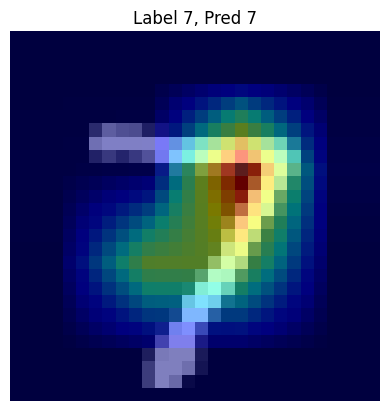

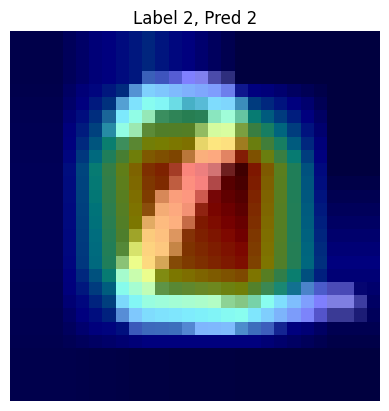

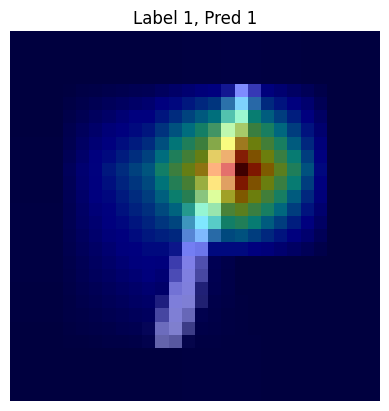

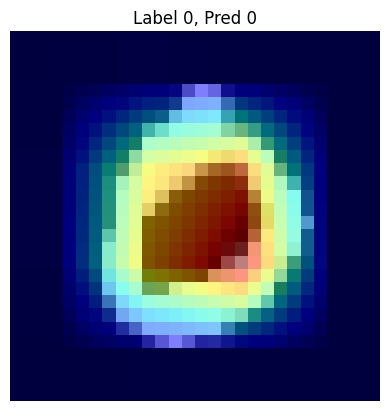

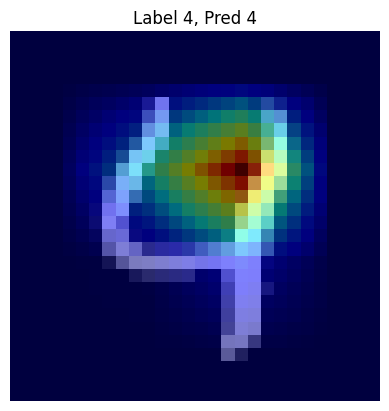

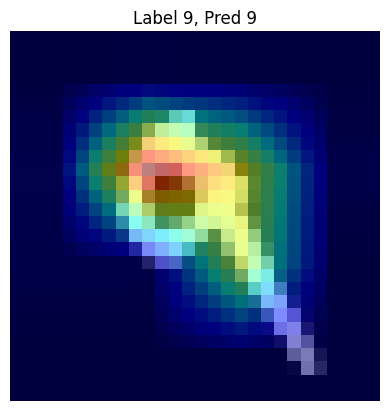

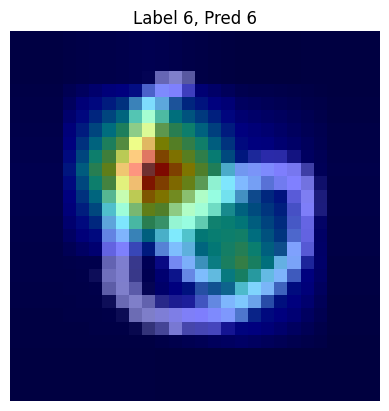

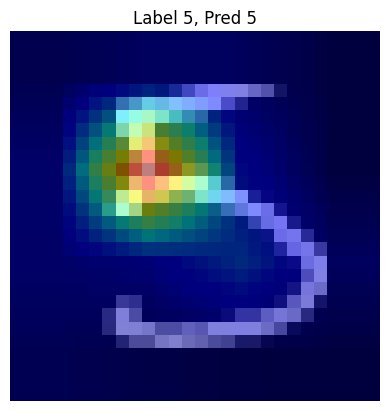

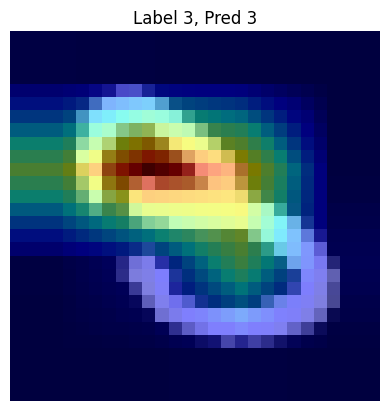

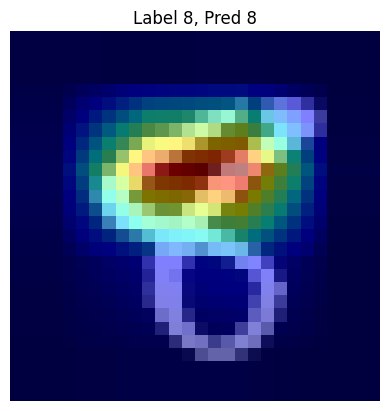

In [10]:
picked = {d: False for d in range(10)}  # track which digits we already saved

with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        preds = model(imgs)
        # get attention from last transformer block
        attn = model.blocks[-1].attn.last_attn
        B, Hh, N, _ = attn.shape
        # average over heads -> (B, N, N)
        attn_mean = attn.mean(dim=1)
        # CLS token is index 0; take its attention to all tokens
        cls_attn = attn_mean[:, 0, :]  # CLS row
        # drop CLS->CLS itself, keep only patch tokens
        cls_to_patches = cls_attn[:, 1:]
        num_patches = model.num_patches
        grid_size = int(math.sqrt(num_patches))
        cls_to_patches = cls_to_patches.reshape(B, grid_size, grid_size)
        for i in range(B):
            label = labels[i].item()
            pred = preds[i].argmax(dim=0).item()
            # only use correctly classified examples
            if pred == label and not picked[label]:
                attn_grid = cls_to_patches[i]
                img      = imgs[i]
                visualize_attention_on_image(img, attn_grid, label, pred)
                picked[label] = True
                if all(picked.values()):
                    break
        if all(picked.values()):
            break